In [40]:
from fastsolv import fastsolv
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error

In [6]:
df = pd.read_csv("biogen_logS.csv")

In [8]:
df['solute_smiles'] = df['SMILES']
df['solvent_smiles'] = 'O'
df['temperature'] = 298

In [11]:
pred_df = fastsolv(df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 2174/2174 [00:09<00:00, 239.42it/s]
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

Predicting: |                                                                                                 …

Predicting: |                                                                                                 …

Predicting: |                                                                                                 …

In [12]:
pred_df

,,,predicted_logS,predicted_logS_stdev
solute_smiles,solvent_smiles,temperature,,
CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H]3C[C@@H]3F)cnc12,O,298,-2.410829,0.245404
CCOc1cc2nn(CCC(C)(C)O)cc2cc1NC(=O)c1cccc(C(F)F)n1,O,298,-1.212813,0.175693
CC(C)(Oc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cc1)C(=O)O,O,298,-1.345955,0.260348
CC#CC(=O)N[C@H]1CCCN(c2c(F)cc(C(N)=O)c3[nH]c(C)c(C)c23)C1,O,298,-2.251865,0.377877
C=CC(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)C1,O,298,-1.829347,0.149144
...,...,...,...,...
Cc1cc(C)cc(C(=O)NCCCNc2ncccn2)c1,O,298,-1.216740,0.122975
CCc1noc(COc2c(C)ccnc2Cl)n1,O,298,-0.424718,0.146248
CC(C)(C)Cc1nnc(-c2cnc3onc(C4CCCC4)c3c2)o1,O,298,-1.593274,0.164386


In [35]:
df['pred'] = pred_df.predicted_logS.values

<Axes: xlabel='LogS', ylabel='pred'>

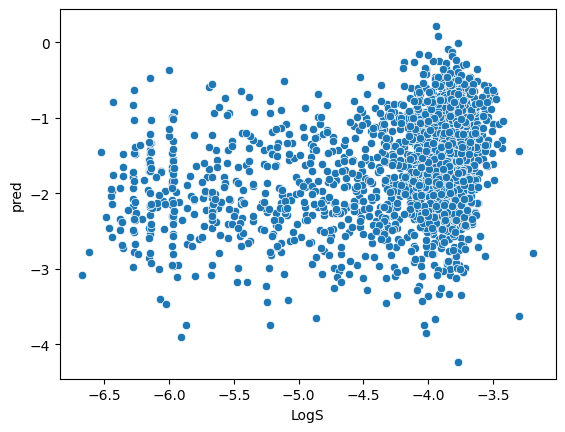

In [36]:
sns.scatterplot(x="LogS",y="pred",data=df)

In [39]:
r2_score(df.LogS,df.pred)

-13.676902895510679

In [41]:
mean_absolute_error(df.LogS,df.pred)

2.5991505449832184